For that lab we will need keras

In [ ]:
!python -m pip install keras

Let's create the [VGG16](https://keras.io/api/applications/vgg/) default model with pretrained weights on [ImageNet](http://www.image-net.org/) dataset

In [ ]:
import keras

model = keras.applications.vgg16.VGG16()

553467904/553467096 [==============================] - 4s 0us/step


### Getting weight and layers data 

First, we will visualize this model

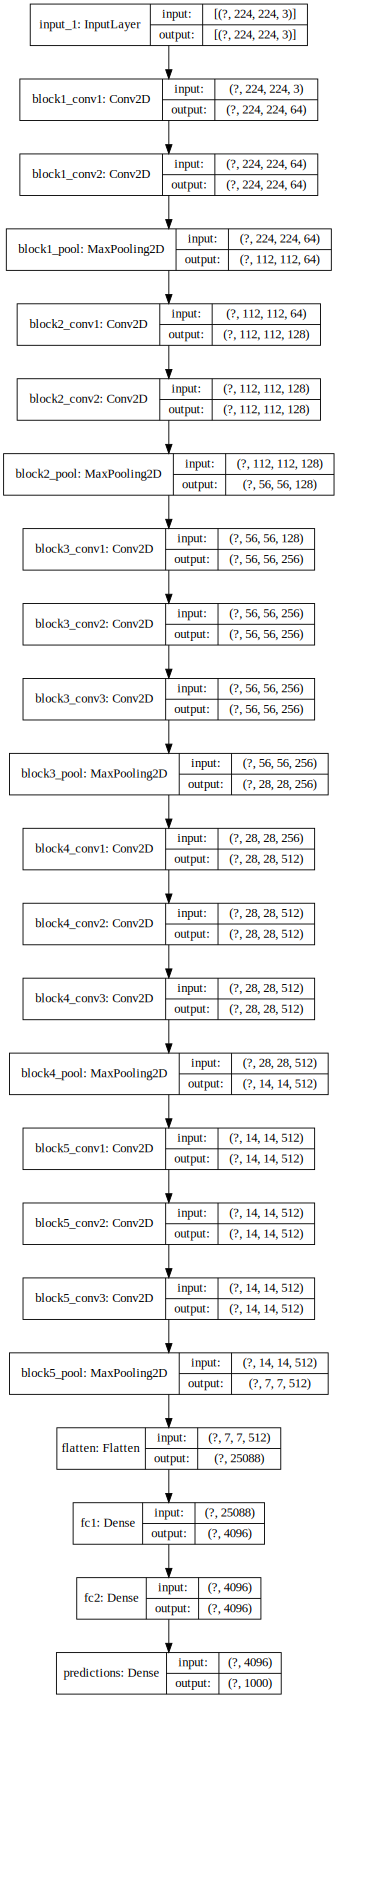

In [ ]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model, show_shapes= True, show_layer_names=True, dpi=65).create(prog='dot', format='svg'))

And also see the shapes of weights

In [ ]:
model.summary()

In [ ]:
model.layers[1]

In [ ]:
weights = model.get_weights()
for weight in weights:
    print(weight.shape)

(3, 3, 3, 64)
(64,)
(3, 3, 64, 64)
(64,)
(3, 3, 64, 128)
(128,)
(3, 3, 128, 128)
(128,)
(3, 3, 128, 256)
(256,)
(3, 3, 256, 256)
(256,)
(3, 3, 256, 256)
(256,)
(3, 3, 256, 512)
(512,)
(3, 3, 512, 512)
(512,)
(3, 3, 512, 512)
(512,)
(3, 3, 512, 512)
(512,)
(3, 3, 512, 512)
(512,)
(3, 3, 512, 512)
(512,)
(25088, 4096)
(4096,)
(4096, 4096)
(4096,)
(4096, 1000)
(1000,)


We can also access each layer separately

In [ ]:
layers = model.layers
for layer in layers:
    print(layer)

You might notice that the number of weights is greater than the number of layers. This is because we also have bias weights, in which we are not currently inerested in.

### Task 1 
Visualize weights from the input layer

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

In [ ]:
w = weights[0]
q = np.transpose(w, (3, 0, 1, 2, ))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


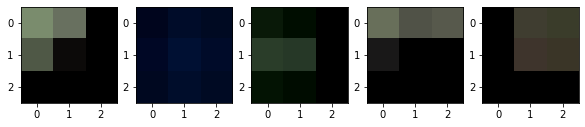

In [ ]:
img = cv2.cvtColor(q[0, :, :, :], cv2.COLOR_BGR2RGB)
img1 = cv2.cvtColor(q[1, :, :, :], cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(q[2, :, :, :], cv2.COLOR_BGR2RGB)
img3 = cv2.cvtColor(q[3, :, :, :], cv2.COLOR_BGR2RGB)
img4 = cv2.cvtColor(q[4, :, :, :], cv2.COLOR_BGR2RGB)

fig, axs = plt.subplots(1, 5, figsize=(10, 20))
axs[1].imshow(img1)
axs[2].imshow(img2)
axs[3].imshow(img3)
axs[4].imshow(img4)
axs[0].imshow(img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


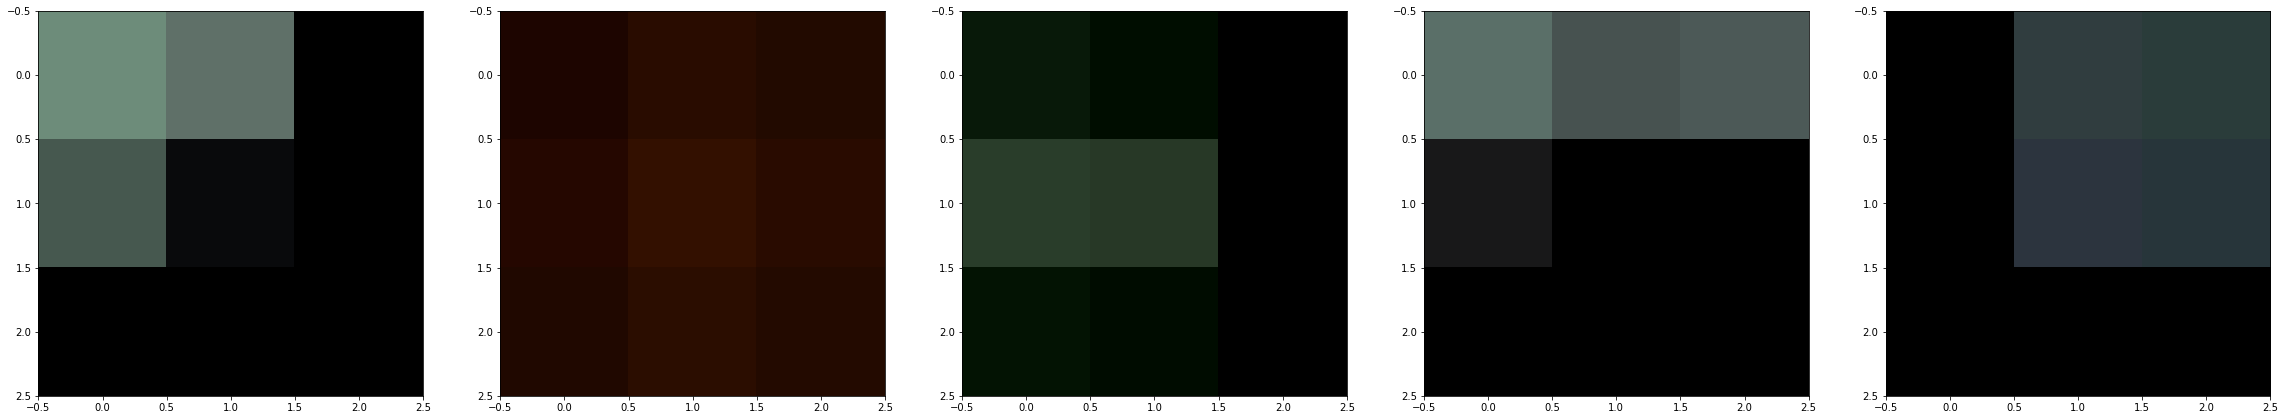

In [ ]:
fig, axs = plt.subplots(1, 5, figsize=(40, 80))

axs[0].imshow(q[0, :, :])
axs[1].imshow(q[1, :, :, :])
axs[2].imshow(q[2, :, :, :])
axs[3].imshow(q[3, :, :, :])
axs[4].imshow(q[4, :, :, :])

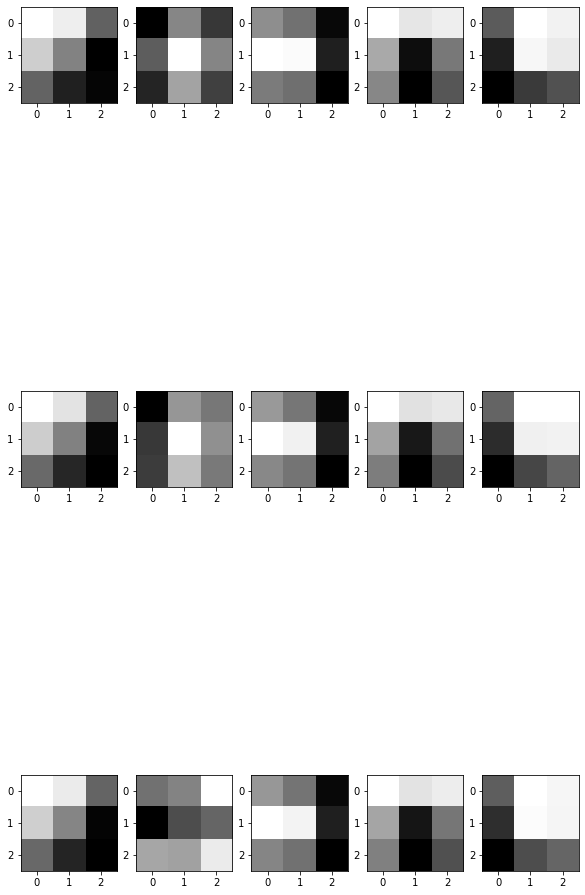

In [ ]:
fig, axs = plt.subplots(3, 5, figsize=(10, 20))
axs[0, 0].imshow(q[:, :, 0, 0], cmap = 'gray')
axs[0,1].imshow(q[:, :, 0, 1], cmap = 'gray')
axs[0,2].imshow(q[:, :, 0, 2], cmap = 'gray')
axs[0,3].imshow(q[:, :, 0, 3], cmap = 'gray')
axs[0,4].imshow(q[:, :, 0, 4], cmap = 'gray')

axs[1, 0].imshow(q[:, :, 1, 0], cmap = 'gray')
axs[1,1].imshow(q[:, :, 1, 1], cmap = 'gray')
axs[1,2].imshow(q[:, :, 1, 2], cmap = 'gray')
axs[1,3].imshow(q[:, :, 1, 3], cmap = 'gray')
axs[1,4].imshow(q[:, :, 1, 4], cmap = 'gray')

axs[2,0].imshow(q[:, :, 2, 0], cmap = 'gray')
axs[2,1].imshow(q[:, :, 2, 1], cmap = 'gray')
axs[2,2].imshow(q[:, :, 2, 2], cmap = 'gray')
axs[2,3].imshow(q[:, :, 2, 3], cmap = 'gray')
axs[2,4].imshow(q[:, :, 2, 4], cmap = 'gray')

plt.show()

### Task 2a

Feed an image to the model and get an output image from some layer

You can see the output from each layer using this [guide](https://stackoverflow.com/a/41712013)

In [ ]:
! wget https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png
! ls -al | grep Lenna

image_path = 'Lenna_(test_image).png'

--2020-12-10 11:56:35--  https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.154.240, 2620:0:861:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.154.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 473831 (463K) [image/png]
Saving to: ‘Lenna_(test_image).png’

Lenna_(test_image). 100%[===================>] 462.73K  --.-KB/s    in 0.06s   

2020-12-10 11:56:36 (7.44 MB/s) - ‘Lenna_(test_image).png’ saved [473831/473831]

-rw-r--r-- 1 root root 473831 May 10  2018 Lenna_(test_image).png


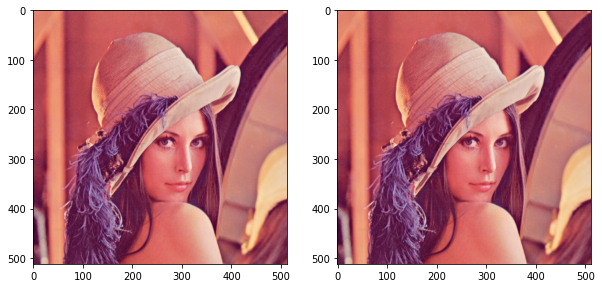

In [ ]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
fig, axs = plt.subplots(1, 2, figsize=(10, 20))
axs[0].imshow(img)
axs[1].imshow(img)

In [ ]:
inp = tf.keras.applications.vgg16.preprocess_input(img)

In [ ]:
inp = np.reshape(inp, (1, 512, 512, 3))

In [ ]:
from keras import backend as K

input = model.input                                           # input placeholder
outputs = [layer.output for layer in model.layers]          # all layer outputs
functors = [K.function([input], [out]) for out in outputs]    # evaluation functions


In [ ]:
q = functors[1](inp)

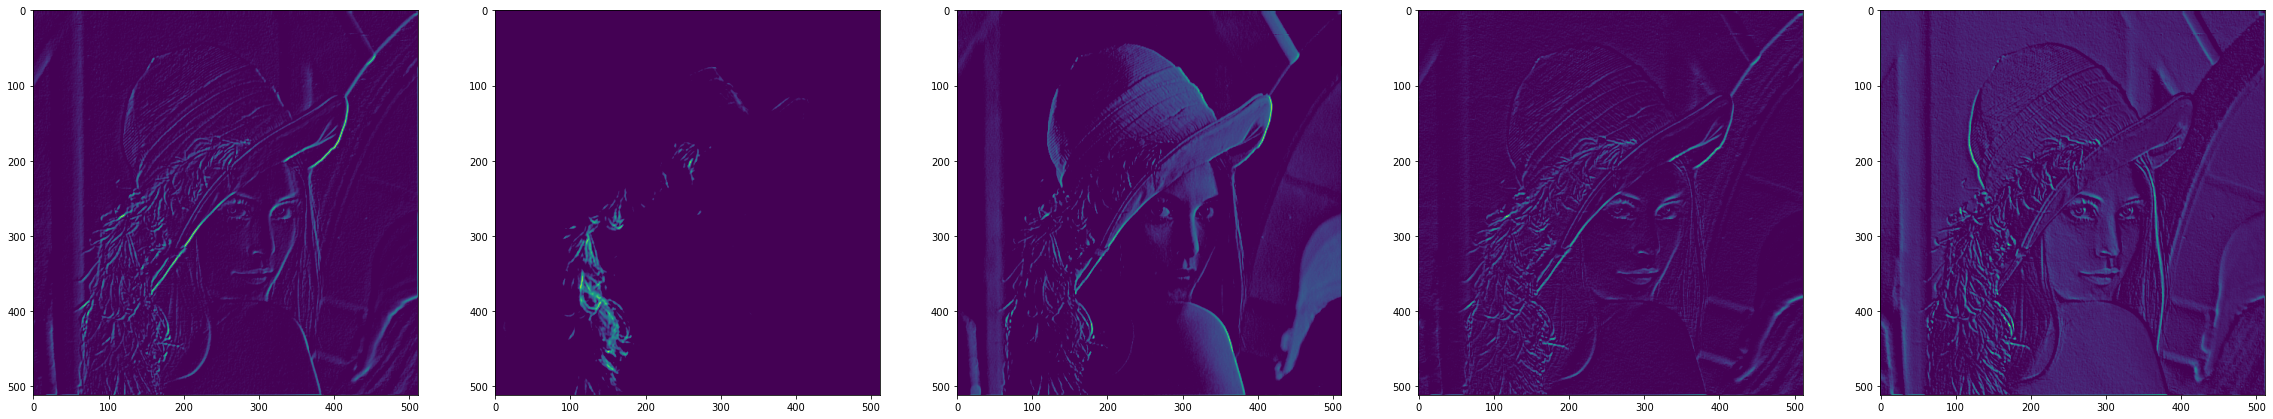

In [ ]:
fig, axs = plt.subplots(1, 5, figsize=(40, 80))
axs[0].imshow(q[0][0, :, :, 0])
axs[1].imshow(q[0][0, :, :, 1])
axs[2].imshow(q[0][0, :, :, 2])
axs[3].imshow(q[0][0, :, :, 3])
axs[4].imshow(q[0][0, :, :, 4])

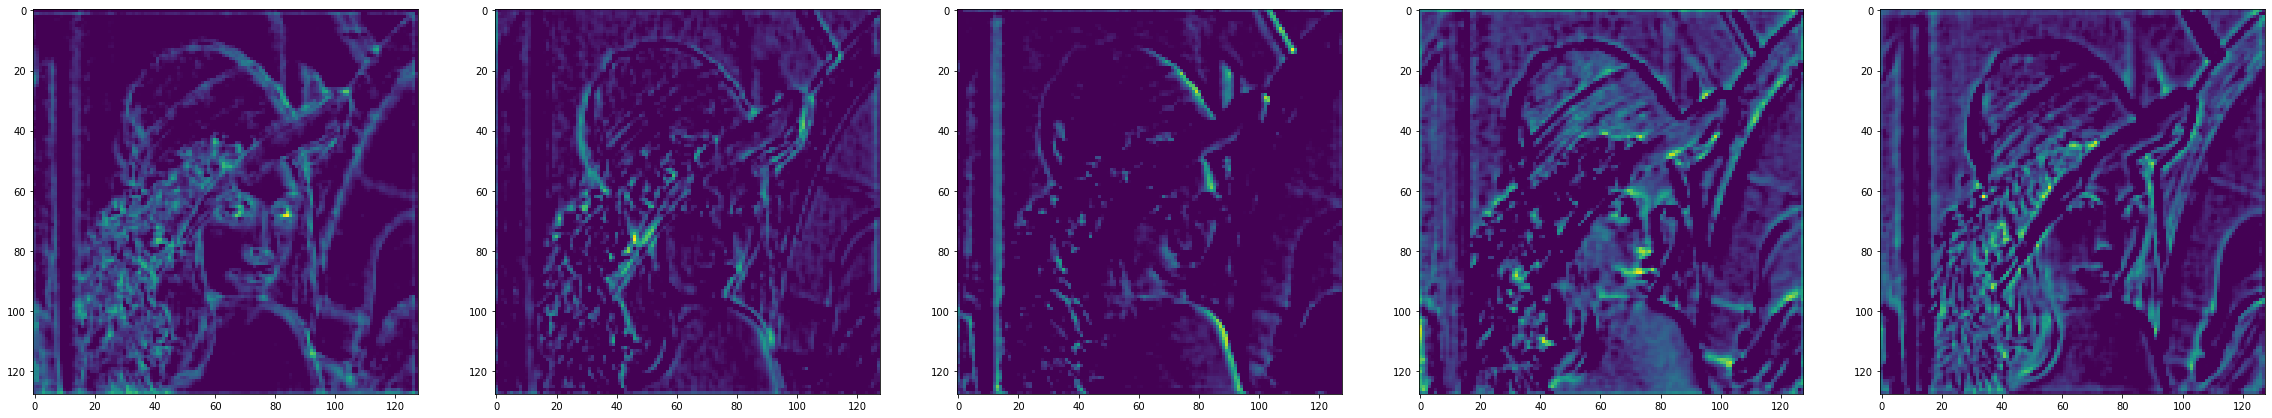

In [ ]:
q = functors[8](inp)
fig, axs = plt.subplots(1, 5, figsize=(40, 80))
axs[0].imshow(q[0][0, :, :, 0])
axs[1].imshow(q[0][0, :, :, 1])
axs[2].imshow(q[0][0, :, :, 2])
axs[3].imshow(q[0][0, :, :, 3])
axs[4].imshow(q[0][0, :, :, 4])

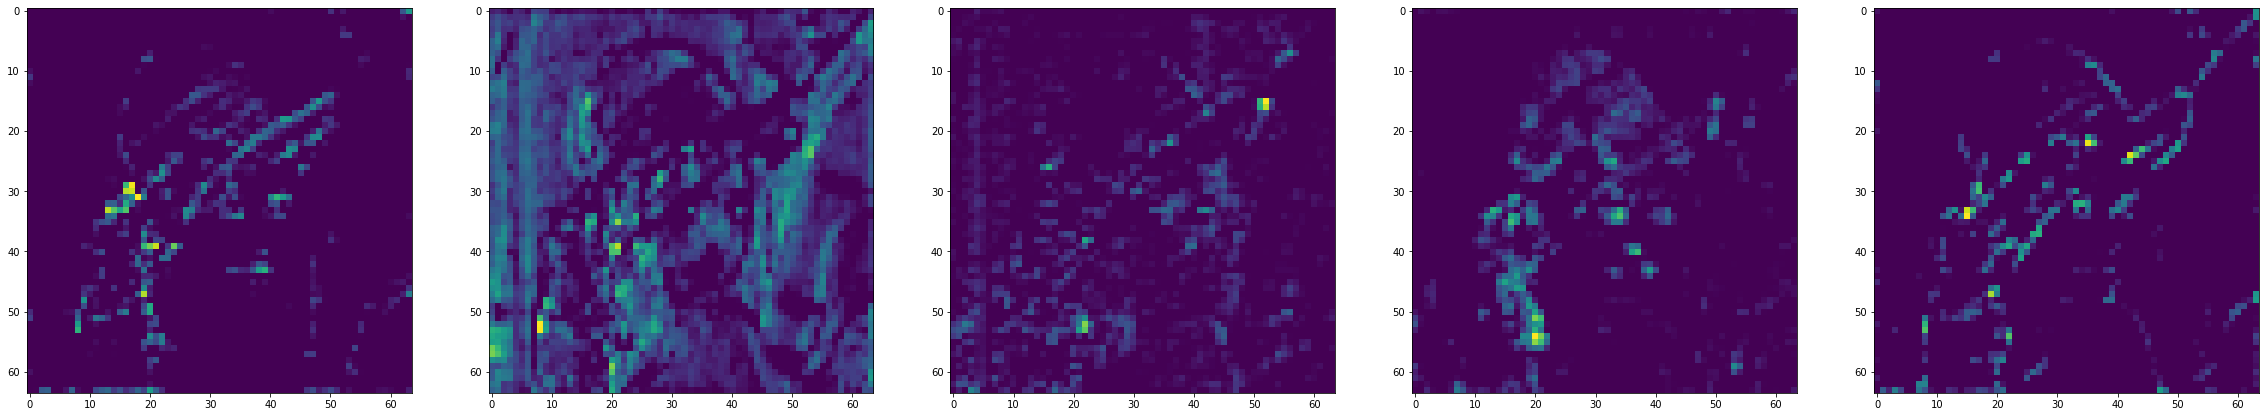

In [ ]:
q = functors[10](inp)
fig, axs = plt.subplots(1, 5, figsize=(40, 80))
axs[0].imshow(q[0][0, :, :, 0])
axs[1].imshow(q[0][0, :, :, 1])
axs[2].imshow(q[0][0, :, :, 2])
axs[3].imshow(q[0][0, :, :, 3])
axs[4].imshow(q[0][0, :, :, 4])

### Task 2b

Using [this module](https://www.google.ru/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&ved=2ahUKEwjDwsG9583sAhULx4sKHcMcCh4QFjAEegQIBhAC&url=https%3A%2F%2Fgithub.com%2Fraghakot%2Fkeras-vis&usg=AOvVaw3dxzpVlAlBY3nmBLIJVWAs) visualize the activation maximizing input images from the layer of your choice 

In [ ]:
!pip install vis

In [ ]:
from keras.applications import VGG16
from vis.utils import utils
from keras import activations

# Build the VGG16 network with ImageNet weights
model = VGG16(weights='imagenet', include_top=True)
# Utility to search for layer index by name. 
# Alternatively we can specify this as -1 since it corresponds to the last layer.
layer_idx = utils.find_layer_idx(model, 'predictions')

# Swap softmax with linear
model.layers[layer_idx].activation = activations.linear
model = utils.apply_modifications(model)

In [ ]:
!pip install scipy==1.1.0
!pip install tensorflow==1.10.0
!pip install keras==2.2.2

     |████████████████████████████████| 31.2MB 244kB/s 
ERROR: umap-learn 0.4.6 has requirement scipy>=1.3.1, but you'll have scipy 1.1.0 which is incompatible.
ERROR: tensorflow 2.3.0 has requirement scipy==1.4.1, but you'll have scipy 1.1.0 which is incompatible.
ERROR: plotnine 0.6.0 has requirement scipy>=1.2.0, but you'll have scipy 1.1.0 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1


     |████████████████████████████████| 58.4MB 1.2MB/s 
     |████████████████████████████████| 3.3MB 33.9MB/s 
     |████████████████████████████████| 573kB 38.0MB/s 
     |████████████████████████████████| 12.2MB 40.4MB/s 
ERROR: xarray 0.15.1 has requirement numpy>=1.15, but you'll have numpy 1.14.5 which is incompatible.
ERROR: xarray 0.15.1 has requirement setuptools>=41.2, but you'll have setuptools 39.1.0 which is incompatible.
ERROR: umap-learn 0.4.6 has requirement numpy>=1.17, but you'll have numpy 1.14.5 which is incompatible.
ERROR: umap-learn 0.4.6 has requirement scipy>=1.3.1, but you'll have scipy 1.1.0 which is incompatible.
ERROR: tifffile 2020.9.3 has requirement numpy>=1.15.1, but you'll have numpy 1.14.5 which is incompatible.
ERROR: spacy 2.2.4 has requirement numpy>=1.15.0, but you'll have numpy 1.14.5 which is incompatible.
ERROR: seaborn 0.11.0 has requirement numpy>=1.15, but you'll have numpy 1.14.5 which is incompatible.
ERROR: plotnine 0.6.0 has requirement 

     |████████████████████████████████| 307kB 5.6MB/s 
     |████████████████████████████████| 51kB 5.2MB/s 
  Found existing installation: Keras-Preprocessing 1.1.2
    Uninstalling Keras-Preprocessing-1.1.2:
      Successfully uninstalled Keras-Preprocessing-1.1.2
  Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3


In [ ]:
from vis.visualization import visualize_activation

from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (18, 6)

# 20 is the imagenet category for 'ouzel'
img = visualize_activation(model, layer_idx, filter_indices=20)
plt.imshow(img)

ImportError: ignored

### Task 3

Classify [cats and dogs](https://www.kaggle.com/c/dogs-vs-cats/data) images with [features from CNN](https://keras.io/applications/#extract-features-with-vgg16) using SVM / KNN / etc...

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/data/cnd/train.zip

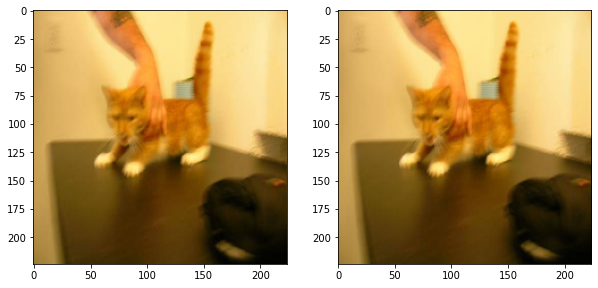

In [ ]:
img = cv2.imread('/content/train/cat.0.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (224, 224))
fig, axs = plt.subplots(1, 2, figsize=(10, 20))
axs[0].imshow(img)
axs[1].imshow(img)
inp = tf.keras.applications.vgg16.preprocess_input(img)
inp = np.reshape(inp, (1, 224, 224, 3))

In [ ]:
import tensorflow as tf
from keras import Sequential
from keras.layers import Dense, Reshape, Flatten, Input, Average, Concatenate, LSTM
from keras.models import Model
from keras.optimizers import Adam
import keras.backend as K
gener = Sequential(model.layers[:-1])

In [ ]:
import os
file_names = os.listdir('/content/train')

In [ ]:
features = []
i = 0
for file_name in file_names:
    i += 1
    img = cv2.imread('/content/train/' + file_name)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224, 224))
    inp = tf.keras.applications.vgg16.preprocess_input(img)
    inp = np.reshape(inp, (1, 224, 224, 3))
    features.append(gener.predict(inp))
    if i % 250 == 0:
        print(i)

In [ ]:
labels = []
for file_name in file_names:
    i += 1
    label = file_name.split('.')[0]
    if label == 'cat':
        labels.append(1.0)
    elif label == 'dog':
        labels.append(0.0)
    else:
        print(file_name)
    if i % 1000 == 0:
        print(i)

In [ ]:
from scipy.io import savemat, loadmat
mdic = {'features':np.array(features, dtype=np.float32),
        'labels':np.array(labels, dtype=np.float32)}
mdic

In [ ]:
from scipy.io import savemat, loadmat

In [ ]:
mdic = loadmat('/content/drive/MyDrive/data/vgg16_DnC.mat')

In [ ]:
mdic['features'].shape

(25000, 1, 4096)

In [ ]:
savemat("vgg16_DnC.mat", mdic, do_compression = True)

In [ ]:
from sklearn.model_selection import train_test_split
X = mdic['features'][:, 0, :]
y = mdic['labels'][0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='auto', kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [ ]:
from sklearn.metrics import classification_report
target_names = ['dog', 'cat 1']
print(classification_report(y_train, clf.predict(X_train), target_names=target_names))
print(classification_report(y_test, clf.predict(X_test), target_names=target_names))

              precision    recall  f1-score   support

         dog       1.00      1.00      1.00     10024
       cat 1       1.00      1.00      1.00      9976

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000

              precision    recall  f1-score   support

         dog       0.98      0.99      0.98      2476
       cat 1       0.99      0.98      0.98      2524

    accuracy                           0.98      5000
   macro avg       0.98      0.98      0.98      5000
weighted avg       0.98      0.98      0.98      5000



Knn

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
print(classification_report(y_train, neigh.predict(X_train), target_names=target_names))
print(classification_report(y_test, neigh.predict(X_test), target_names=target_names))

              precision    recall  f1-score   support

         dog       0.99      0.99      0.99     10024
       cat 1       0.99      0.99      0.99      9976

    accuracy                           0.99     20000
   macro avg       0.99      0.99      0.99     20000
weighted avg       0.99      0.99      0.99     20000

              precision    recall  f1-score   support

         dog       0.99      0.98      0.98      2476
       cat 1       0.98      0.99      0.98      2524

    accuracy                           0.98      5000
   macro avg       0.98      0.98      0.98      5000
weighted avg       0.98      0.98      0.98      5000



### Building your own model

Consider the NON-working example below (x_train not defined)

In [ ]:
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os

model = Sequential() # initialize linear stacked model
# create first conv layer and provide input shapes (other shapes will be calculated automatically)
model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:])) 
# set activation function for the layer
model.add(Activation('relu'))
#repeat
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
# first maxpooling layer with 2x2 window
model.add(MaxPooling2D(pool_size=(2, 2)))
# set dropout to 25% of neurons number
model.add(Dropout(0.25))

# flatten convert ndarray fron the prev layer to 1D vector
model.add(Flatten())
# fully connected layer with 512 neurons
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [ ]:
# use early stopping to optimally terminate training through callbacks
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint
es=EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

# save best model automatically
mc= ModelCheckpoint('yourdirectory/your_model.h5', monitor='val_loss', 
                    mode='min', verbose=1, save_best_only=True)
cb_list=[es,mc]

### Task 4

Create your own simple architecture and train CNN on [MNIST](https://keras.io/datasets/#mnist-database-of-handwritten-digits) dataset. Note that MNIST is 1 color channel dataset.
Test it on some hard images from the web, [such as](https://www.wpclipart.com/education/animal_numbers/animal_number_2.png).

In [ ]:
import keras
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


preprocess

In [ ]:
image_height = 28
image_width = 28
num_channels = 1 


# re-shape the images data
x_train = np.reshape(x_train, (x_train.shape[0], image_height, image_width, num_channels))
x_test = np.reshape(x_test, (x_test.shape[0],image_height, image_width, num_channels))

# re-scale the image data to values between (0.0,1.0]
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.


from keras.utils import to_categorical
num_classes = 10
y_train_cat = to_categorical(y_train,num_classes)
y_test_cat = to_categorical(y_test,num_classes)
y_train_cat.shape, y_test_cat.shape

((60000, 10), (10000, 10))

model

In [ ]:
from keras.layers import Dense, Conv2D, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D

from keras import models

# starting point 
my_model= models.Sequential()

# Add first convolutional block
my_model.add(Conv2D(16, (3, 3), activation='relu', padding='same', 
                    input_shape=(image_height, image_width, num_channels)))
my_model.add(MaxPooling2D((2, 2), padding='same'))

# second block
my_model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
my_model.add(MaxPooling2D((2, 2), padding='same'))
# third block
my_model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
my_model.add(MaxPooling2D((2, 2), padding='same'))
# fourth block
my_model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
my_model.add(MaxPooling2D((2, 2), padding='same'))

# global average pooling
my_model.add(GlobalAveragePooling2D())
# fully connected layer
my_model.add(Dense(64, activation='relu'))
my_model.add(BatchNormalization())
# make predictions
my_model.add(Dense(num_classes, activation='softmax'))


# Show a summary of the model. Check the number of trainable parameters
my_model.summary()


# compile model 
my_model.compile(optimizer='adam', loss='categorical_crossentropy', 
                 metrics=['accuracy'])


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 128)        

In [ ]:
results = my_model.fit(x_train, y_train_cat, 
                    epochs=7, batch_size=128,
                    validation_split=0.1)

Epoch 1/7
422/422 [==============================] - 48s 114ms/step - loss: 0.1663 - accuracy: 0.9554 - val_loss: 0.2064 - val_accuracy: 0.9505
Epoch 2/7
422/422 [==============================] - 47s 112ms/step - loss: 0.0419 - accuracy: 0.9880 - val_loss: 0.2218 - val_accuracy: 0.9337
Epoch 3/7
422/422 [==============================] - 48s 114ms/step - loss: 0.0290 - accuracy: 0.9915 - val_loss: 0.0790 - val_accuracy: 0.9792
Epoch 4/7
422/422 [==============================] - 48s 113ms/step - loss: 0.0208 - accuracy: 0.9938 - val_loss: 0.1030 - val_accuracy: 0.9715
Epoch 5/7
422/422 [==============================] - 48s 113ms/step - loss: 0.0158 - accuracy: 0.9954 - val_loss: 0.0569 - val_accuracy: 0.9842
Epoch 6/7
422/422 [==============================] - 48s 113ms/step - loss: 0.0125 - accuracy: 0.9961 - val_loss: 0.1678 - val_accuracy: 0.9505
Epoch 7/7
422/422 [==============================] - 48s 114ms/step - loss: 0.0125 - accuracy: 0.9958 - val_loss: 0.3892 - val_accuracy:

In [ ]:
pred = my_model.predict(x_test)


In [ ]:
class_pred = np.argmax(pred, axis=1)
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, class_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97       980
           1       0.95      1.00      0.97      1135
           2       0.96      0.95      0.96      1032
           3       0.98      0.99      0.98      1010
           4       0.70      1.00      0.82       982
           5       0.96      0.98      0.97       892
           6       0.93      0.98      0.96       958
           7       0.66      1.00      0.79      1028
           8       1.00      0.71      0.83       974
           9       1.00      0.24      0.38      1009

    accuracy                           0.88     10000
   macro avg       0.91      0.88      0.86     10000
weighted avg       0.91      0.88      0.86     10000



In [ ]:
import os
path_folder = '/content/drive/MyDrive/data/hard'
paths = os.listdir(path_folder)
paths

['kisspng-number-nuvola-arabic-numerals-numbers-glitter-5b19e37599e3f5.5118448615284232856304.jpg',
 'a8347aa9db6c6071b24891a725dd19ba.png',
 'download-clip-art-number-2.jpg',
 '119181345_1.png',
 '2ca15437-c920-11e3-9d47-005056c00008.jpg',
 'c2108ba0cbc0.png',
 '22-222202_6-number-transparent-background-png-number-6-clipart.png',
 '481.jpg',
 'ncnmheo-001.png']

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline 

In [ ]:
list_img = []
for path in paths:
    image_path = path_folder + '/' + path
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (28, 28))
    list_img.append(img)
list_img = np.array(list_img)

[6 4 4 1 6 6 6 4 2]


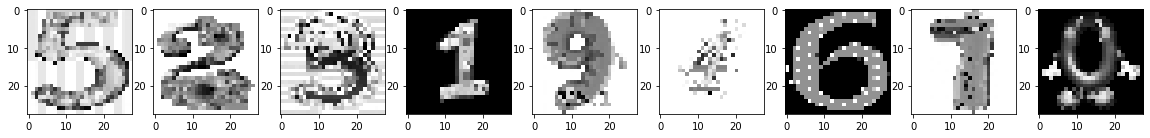

In [ ]:
fig, axs = plt.subplots(1, 9, figsize=(20, 40))
for i in range(len(list_img)):
    axs[i].imshow(list_img[i], cmap='gray')
print(np.argmax(pred, axis=1))

In [ ]:
# re-shape the images data
x_hard_test = np.reshape(list_img, (9, image_height, image_width, num_channels))

x_hard_test = x_hard_test.astype('float32') / 255.

In [ ]:
pred = my_model.predict(x_hard_test)
np.argmax(pred, axis=1)

array([6, 4, 4, 1, 6, 6, 6, 4, 2])

### Task 5

Augment MNIST data using [ImageDataGenerator](https://keras.io/preprocessing/image/) and color inversion + visualize (or save) augmented images.
Train your model on augmented data and compare the results on your images from the web.

In [ ]:
import random

In [ ]:
 x_train[1].shape

(28, 28)

In [ ]:
def colour_inversion(img):
    if random.random() < 0.5:
        inverted_img = 255 - img
    else:
        inverted_img = img
    return inverted_img

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

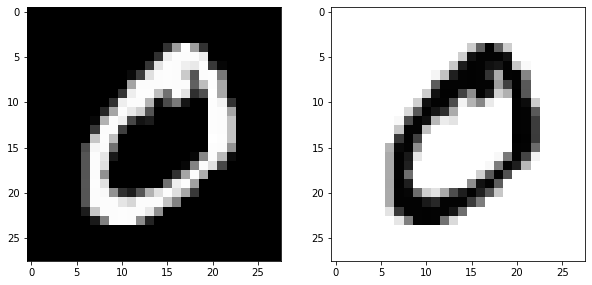

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 20))
axs[0].imshow(x_train[1], cmap='gray')
axs[1].imshow( colour_inversion(x_train[1]), cmap='gray')

In [ ]:

x_train = np.reshape(x_train, (x_train.shape[0], image_height, image_width, num_channels))

datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    preprocessing_function=colour_inversion,
    validation_split=0.1,
    rescale= 1./255)
# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
datagen.fit(x_train)
# fits the model on batches with real-time data augmentation:


In [ ]:
from keras.utils import to_categorical
num_classes = 10
y_train_cat = to_categorical(y_train,num_classes)
y_test_cat = to_categorical(y_test,num_classes)
y_train_cat.shape, y_test_cat.shape

((60000, 10), (10000, 10))

In [ ]:
data_gen = datagen.flow(x_train, y_train_cat, batch_size=100)
results = my_model.fit(data_gen,  steps_per_epoch=600,  epochs=5)

Epoch 1/5
600/600 [==============================] - 65s 109ms/step - loss: 0.3547 - accuracy: 0.8864
Epoch 2/5
600/600 [==============================] - 64s 107ms/step - loss: 0.1606 - accuracy: 0.9485
Epoch 3/5
600/600 [==============================] - 65s 108ms/step - loss: 0.1314 - accuracy: 0.9586
Epoch 4/5
600/600 [==============================] - 65s 108ms/step - loss: 0.1135 - accuracy: 0.9634
Epoch 5/5
600/600 [==============================] - 65s 108ms/step - loss: 0.1033 - accuracy: 0.9669


[8 8 8 1 8 8 8 8 4]


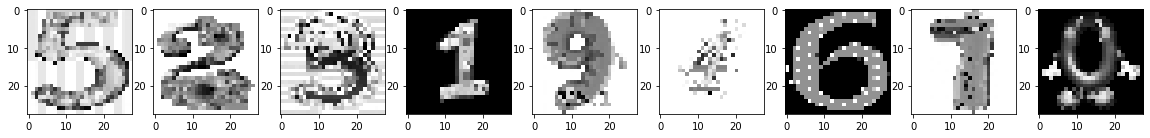

In [ ]:
fig, axs = plt.subplots(1, 9, figsize=(20, 40))
for i in range(len(list_img)):
    axs[i].imshow(list_img[i], cmap='gray')
print(np.argmax(pred, axis=1))

In [ ]:
x_hard_test = np.reshape(list_img, (9, image_height, image_width, num_channels))

x_hard_test = x_hard_test.astype('float32') / 255.

In [ ]:
pred = my_model.predict(x_hard_test)
np.argmax(pred, axis=1)
pred[4]

array([6.9401423e-03, 2.0275355e-04, 2.1557339e-02, 1.5828850e-04,
       8.1553636e-03, 8.3897921e-04, 7.2265649e-04, 2.1758163e-03,
       9.4492793e-01, 1.4320831e-02], dtype=float32)

### Task 6

Try any of the data augmentation frameworks and show the results

### Task 7

[Use](https://www.learnopencv.com/keras-tutorial-fine-tuning-using-pre-trained-models/) pretrained model to train on CIFAR-10 dataset. For that, you can try to use your CNN architecture. 

In [ ]:
features = []
i = 0
for file_name in file_names:
    i += 1
    img = cv2.resize(img, (224, 224))
    inp = tf.keras.applications.vgg16.preprocess_input(img)
    inp = np.reshape(inp, (1, 224, 224, 3))

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [ ]:
pretr_model = keras.applications.vgg16.VGG16(input_shape=(32, 32))

### Task 8

[Implement](https://medium.com/mlreview/making-ai-art-with-style-transfer-using-keras-8bb5fa44b216) the style transfer technique